In [1]:
import pandas as pd
import spacy
from spacy_langdetect import LanguageDetector
from functools import reduce
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sys
import gc
import numpy as np
import json
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Lambda
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
import tensorflow as tf
#nltk
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
y_pred = np.load('../../ypred.npy')
y_true = np.load('../../ytrain.npy')
indexes = np.argsort(-y_pred)[:,:5]
for x in range(len(y_pred)):
    y_pred[x][indexes[x]] = 99

y_pred = (y_pred==99).astype(float)
    
mat = multilabel_confusion_matrix(y_true, y_pred)

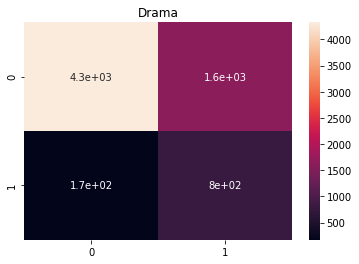

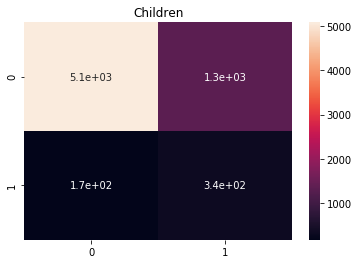

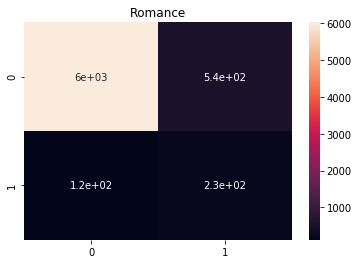

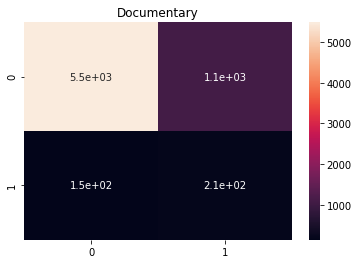

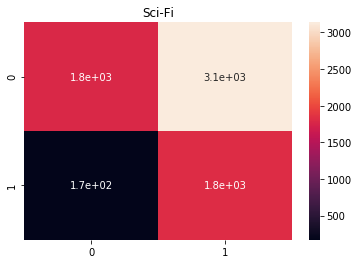

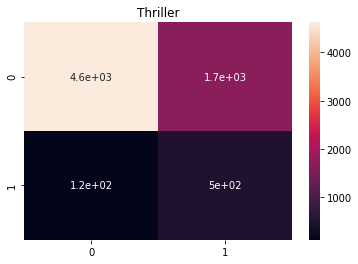

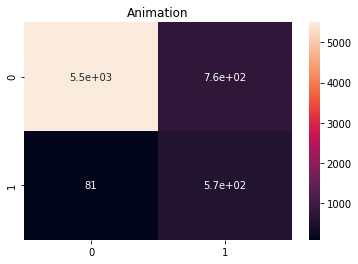

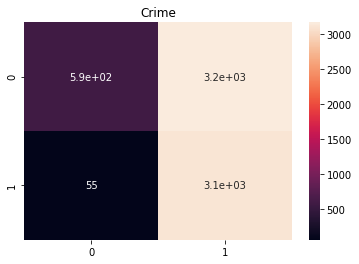

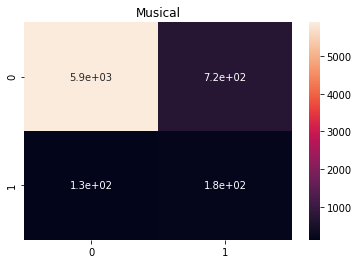

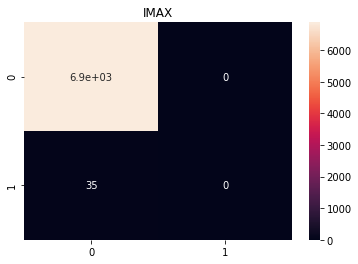

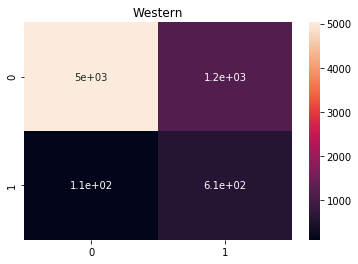

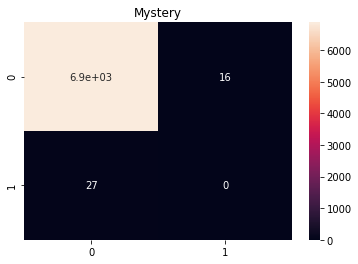

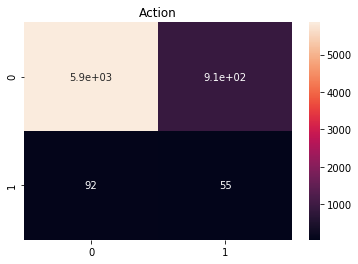

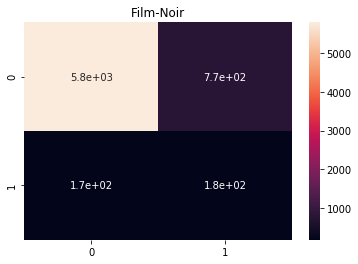

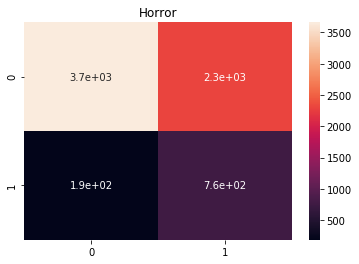

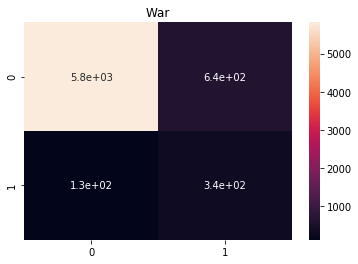

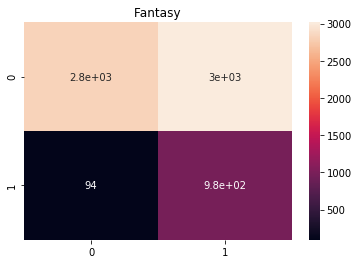

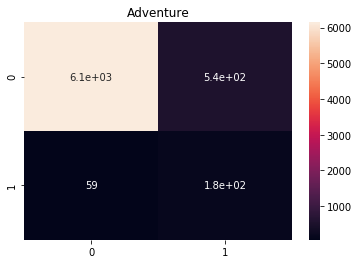

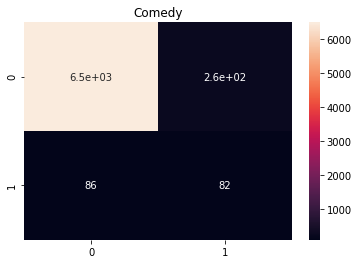

In [97]:
for x in range(len(genres)):
    plt.figure()
    sns.heatmap(mat[x],annot=True).set_title(list(genres)[x])

In [42]:
genres = df.genres.str.get_dummies(sep=' ').columns

In [43]:
genres

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

(34591, 19)

In [46]:
bag_words69 = set([])
for gen_idx in range(19):
    print(genres[gen_idx])
    count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                                    ngram_range=(1, 2), max_features=100)
    count_vec.fit(df.prepro[labels[:,gen_idx] == 0]).transform(df.prepro)
    words_found_all = count_vec.get_feature_names()

    words_tot = []
    intersection = set([])
    count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                                ngram_range=(1, 2), max_features=100)
    synps_per_genre = df.prepro[labels[:,gen_idx] == 1]

    count_train = count_vec.fit(synps_per_genre)
    bag_of_words = count_vec.transform(synps_per_genre)
    words_found = count_vec.get_feature_names()
    intersection = intersection.union(list(set(words_found) - set(words_found_all)))
    words_of_interes = (intersection - set(['person','place','john','know','long','veri']))
    bag_words69 = bag_words69.union(words_of_interes)

Action
Adventure
Animation
Children
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
IMAX
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western


In [52]:
bag_words69 = list(bag_words69)
np.save('bag69',bag_words69)

In [48]:
ss = np.load('../utils/words.npy')

In [80]:
ss =['danger', 'attack', 'race', 'music', 'reveal', 'game', 'cop', 'past',
       'art', 'polic', 'documentar', 'money', 'reveng', 'love', 'gang',
       'struggl', 'romanc', 'war', 'dead', 'investig', 'crime', 'apach', 'cowboy', 'adventur', 
     'sing','stage','interview','space','haunt','travel','territor','sheriff','break','sex','killer',
     'terror','magic','broadway']

In [81]:
ss= list(set(ss))

In [85]:
len(ss)

38

In [160]:
sa = np.concatenate((ss,['investig', 'crime', 'investig', 'apach', 'cowboy', 'adventur','concert']))



cop attack space haunt


career', 'concert', 'new york'}

# rest of the code

In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv('../data/radix-challenge/train.csv')

In [5]:
# print(df.shape)
# original_len = len(df)
# df.head()

In [6]:
# # display the missing values in each column
# print("-Sum of all missing values\n", df.isnull().sum())
# print("\n-Sum of all Nan values\n", df.isna().sum())

In [7]:
# nlp = spacy.load('en_core_web_sm')
# nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

In [8]:
# lang_dict = {'language':[],'score':[],'synopsis':[]}
# for syps in df.sample(frac=1).synopsis[:3500]:
#     lang_dict['synopsis'].append(syps)
#     doc = nlp(syps)
#     for i,val in doc._.language.items():
#         lang_dict[i].append(val)
    

In [9]:
# languages_df = pd.DataFrame(lang_dict)
# languages_df.head()

In [10]:
# languages_df.language.value_counts()

In [11]:
# languages_df.describe()

In [12]:
genres = set(reduce(lambda x, y: x+y,df.genres.str.split(' ')))
# print("total genres found:",len(genres))
# genres

In [13]:
len(genres)

19

In [14]:
synps_len = df.synopsis.map(len)
# sns.distplot(synps_len)

In [15]:
# synps_len.describe()

In [16]:
# synps_len.quantile(.05)

In [17]:
# df[(synps_len<20)].iloc[:5]

In [18]:
# df[(synps_len>20) & (synps_len<84)].iloc[:5]

In [19]:
# droping the left tail
df = df[synps_len>int(synps_len.quantile(.05))]
# after_tails_len = len(df)
# print("# of rows dropped after tail removal:",original_len-after_tails_len)

In [20]:
# Drop Synopsis in different languages than english
# lang_list = [nlp(syps)._.language['language'] for syps in df.synopsis]
lang_list = np.load('../utils/langs.npy')
df = df.loc[map(lambda x: x == 'en',lang_list)]
# non_english_len = len(df)
# print("Rows dropped of other languages:",after_tails_len-non_english_len)

In [21]:
# text = df.synopsis.iloc[0].lower()

In [22]:
# doc = nlp(text)

In [23]:
# synops_lemmatzd = [' '.join([x.lemma_ for x in nlp(text)]) for text in df.synopsis]

In [24]:
stemming = PorterStemmer()
stops = set(stopwords.words("english")) 
def stemmer_stop_tokenizer(synopsis):
    """Remove stopwords and lemmatize the text."""
    tokens = nltk.word_tokenize(synopsis)
    stemmed_list = [stemming.stem(word) for word in tokens if word.isalpha()]
    stop_del = " ".join([w for w in stemmed_list if not w in stops])
    return stop_del
df['prepro'] = df.synopsis.map(stemmer_stop_tokenizer)

In [25]:
labels = df.genres.str.get_dummies(sep=' ').values

In [26]:
# genres_dict = {}
# for i,x in enumerate(df.genres.str.get_dummies(sep=' ').columns):
#     genres_dict[i] = x
    

In [27]:
# with open('../genres.txt', 'w') as f:
#     json.dump(genres_dict, f)

In [28]:
# freq_genres = (df.genres.str.get_dummies(sep=' ').sum()/len(df)).reset_index()
# plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
# sns.barplot(x='index',y=0,data=freq_genres)
# plt.xticks(rotation=30)

In [29]:
# df.genres.str.get_dummies(sep=' ').sum()/len(df)

In [30]:
MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 250
VAL_TEST_SPLIT = .2
synpses = df.prepro.values
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(synpses)
sequences = tokenizer.texts_to_sequences(synpses)

In [31]:
with open('tokenizerwo.txt', 'w') as f:
    json.dump(tokenizer.to_json(), f)

In [32]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# pad to 800 words lenght
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 45220 unique tokens.


In [33]:
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                                ngram_range=(1, 2), max_features=100)
count_vec.fit(df.prepro).transform(df.prepro)
words_found_all = count_vec.get_feature_names()

words_tot = []
intersection = set([])
for gen_idx in range(19):
    count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                                ngram_range=(1, 2), max_features=100)
    synps_per_genre = df.prepro[labels[:,gen_idx] == 1]

    count_train = count_vec.fit(synps_per_genre)
    bag_of_words = count_vec.transform(synps_per_genre)
    words_found = count_vec.get_feature_names()
    intersection = intersection.union(list(set(words_found) - set(words_found_all))[:3])
words_of_interes = (intersection - set(['person','place','john','know','long','veri']))

In [34]:
words_of_interes = words_of_interes.union(['documentar','danger','music','gang','money','struggl', 'war','love']) - set(['lo','parent','includ','harri','robert','base','director','happen',
                                               'coupl','head','high','involv','face','success','tale','sheriff',
                                               'civil','christma','villag','world war','bandit','gangster','warrior','documentari','fall love'])

In [35]:
words_of_interes

{'affair',
 'ancient',
 'armi',
 'best',
 'bodi',
 'cat',
 'comedi',
 'corrupt',
 'danger',
 'documentar',
 'footag',
 'gang',
 'german',
 'hi wife',
 'investig',
 'join',
 'littl',
 'love',
 'lover',
 'machin',
 'magic',
 'mickey',
 'militari',
 'miss',
 'money',
 'music',
 'new york',
 'prison',
 'race',
 'romant',
 'russian',
 'scene',
 'sing',
 'sister',
 'struggl',
 'surviv',
 'texa',
 'war',
 'wild'}

In [107]:
len(np.load('words.npy'))

18

In [36]:
for word in words_of_interes:
    df[word] = df.prepro.map(lambda x: int(word in x))

In [37]:
data = np.concatenate((data,df[words_of_interes].values),axis=1)

In [38]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VAL_TEST_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

In [39]:
# (x_train,x_train_bag), (x_val,x_val_bag) = [(data_group[:,:800],data_group[:,800:]) for data_group in [x_train, x_val]]

In [40]:
# Loading pretrained embedings
# first, build index mapping words in the embeddings set
# to their embedding vector
print('Indexing word vectors.')
BASE_DIR = '../utils/'
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')

EMBEDDING_DIM = 100
embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'), encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

Indexing word vectors.


In [56]:
bag_words69
# # create embeding matrix to go from token to embeding
num_words = len(bag_words69)
embedding_matrix_69 = np.zeros((num_words, EMBEDDING_DIM))
for i,word in enumerate(bag_words69):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix_69[i] = embedding_vector

In [57]:
embedding_matrix_69

array([[ 0.79618001,  0.56779999, -0.96452999, ..., -0.28637001,
         0.54822999, -0.33597001],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.026675  ,  0.86897999, -0.11768   , ...,  0.16780999,
         0.93120003, -0.26357999],
       ...,
       [-0.25376001, -0.59062999,  0.031543  , ...,  0.030276  ,
        -0.25224999, -0.055739  ],
       [-0.38234001,  0.24375001,  0.11322   , ...,  0.28397   ,
         0.53671002,  0.32453999],
       [-0.24861   ,  0.65491998, -0.34935001, ..., -0.96586001,
         0.79163003,  0.12448   ]])

In [61]:
word_index.items()

dict_items([('hi', 1), ('a', 2), ('ha', 3), ('life', 4), ('one', 5), ('thi', 6), ('find', 7), ('young', 8), ('film', 9), ('love', 10), ('live', 11), ('get', 12), ('man', 13), ('new', 14), ('famili', 15), ('take', 16), ('two', 17), ('stori', 18), ('friend', 19), ('world', 20), ('year', 21), ('becom', 22), ('in', 23), ('wa', 24), ('he', 25), ('make', 26), ('time', 27), ('woman', 28), ('onli', 29), ('father', 30), ('tri', 31), ('girl', 32), ('work', 33), ('come', 34), ('day', 35), ('murder', 36), ('meet', 37), ('help', 38), ('turn', 39), ('set', 40), ('wife', 41), ('back', 42), ('way', 43), ('war', 44), ('begin', 45), ('discov', 46), ('home', 47), ('town', 48), ('first', 49), ('kill', 50), ('fall', 51), ('must', 52), ('go', 53), ('son', 54), ('old', 55), ('school', 56), ('forc', 57), ('mother', 58), ('decid', 59), ('daughter', 60), ('dure', 61), ('peopl', 62), ('want', 63), ('three', 64), ('death', 65), ('return', 66), ('follow', 67), ('group', 68), ('also', 69), ('boy', 70), ('soon', 71)

In [62]:
# # create embeding matrix to go from token to embeding
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [64]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
np.save('embeding_matrix',embedding_matrix)

In [84]:
# embedding_matrix = np.load('../utils/embeding_matrix.npy')
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

# model = tf.keras.Sequential([
#     embedding_layer,
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(19, activation='sigmoid')
# ])
def crop():
    def func(x):
        return x[:,:800], x[:,800:]
    return Lambda(func)





sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH+18,), dtype='int32')

x_synps, top_words = crop()(sequence_input)
embedded_sequences = embedding_layer(x_synps)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))(embedded_sequences)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Concatenate(axis=-1)([x,tf.cast(top_words,'float32')])
x = Dense(128, activation='relu')(x)



# x = Conv1D(64, 5, activation='relu')(embedded_sequences)
# x = MaxPooling1D(5)(x)
# x = Conv1D(64, 5, activation='relu')(x)
# x = MaxPooling1D(5)(x)
# x = Conv1D(64, 5, activation='relu')(x)
# x = GlobalMaxPooling1D()(x)
# x = tf.keras.layers.Concatenate(axis=-1)([x,tf.cast(top_words,'float32')])
# x = Dense(200, activation='relu')(x)



preds = Dense(19, activation='sigmoid')(x)

model = Model(sequence_input, preds)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy',tf.keras.metrics.Precision(top_k=5)])

Training model.


In [86]:
np.load('words.npy')

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [85]:
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',verbose=2,factor=0.5, patience=3)
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_val, y_val), callbacks=[checkpointer,reduce_lr])

Train on 27673 samples, validate on 6918 samples
Epoch 1/20
27648/27673 [============================>.] - ETA: 0s - loss: 0.7662 - accuracy: 0.8872 - precision_1: 0.1923
Epoch 00001: val_loss improved from inf to 0.69360, saving model to weights.hdf5
27673/27673 [==============================] - 57s 2ms/sample - loss: 0.7661 - accuracy: 0.8872 - precision_1: 0.1923 - val_loss: 0.6936 - val_accuracy: 0.9003 - val_precision_1: 0.1670
Epoch 2/20
27648/27673 [============================>.] - ETA: 0s - loss: 0.6933 - accuracy: 0.8998 - precision_1: 0.1688
Epoch 00002: val_loss improved from 0.69360 to 0.69319, saving model to weights.hdf5
27673/27673 [==============================] - 57s 2ms/sample - loss: 0.6933 - accuracy: 0.8998 - precision_1: 0.1688 - val_loss: 0.6932 - val_accuracy: 0.9003 - val_precision_1: 0.1670
Epoch 3/20
27648/27673 [============================>.] - ETA: 0s - loss: 0.6932 - accuracy: 0.8998 - precision_1: 0.1506
Epoch 00003: val_loss improved from 0.69319 to 

KeyboardInterrupt: 

In [ ]:
model.load_weights("weights.hdf5")

In [ ]:
preds_train = model.predict(x_train)
preds_val = model.predict(x_val)

In [ ]:
precision_obj = tf.keras.metrics.Precision(top_k=5)
precision_obj(y_val,preds_val)

Val precision: 0.3037 --- B1024, lr.001,.0001

Val precision: 0.3098 --- B32, lr.001,.0001

In [ ]:
post_train = np.concatenate((preds_train,x_train_bag),axis=1)
post_val = np.concatenate((preds_val,x_val_bag),axis=1)

In [ ]:
linearSVC=OneVsRestClassifier(LinearSVC(), n_jobs=1)
accuracy_LinearSVC=pd.DataFrame(columns=['Genre', 'accuracy_LinearSVC'])
overall_pred = np.zeros(y_val.shape)
for genre_idx in range(19):
    linearSVC.fit(post_train, y_train[:,genre_idx])
    prediction = linearSVC.predict(post_val)
    overall_pred[:,genre_idx] = prediction
    accuracy_LinearSVC.loc[genre_idx,'Genre'] = list(genres)[genre_idx]
    accuracy_LinearSVC.loc[genre_idx,'accuracy_LinearSVC'] = accuracy_score(y_val[:,genre_idx], prediction)

In [ ]:
precision_obj(y_val, overall_pred)

In [ ]:
accuracy_LinearSVC

In [ ]:
del model
gc.collect()

In [ ]:
BASE_DIR = '../utils/'
PATH_TO_EMBEDING = os.path.join(BASE_DIR, 'embeding_matrix.npy')
PATH_TO_WEIGHTS = os.path.join(BASE_DIR, 'model_weights.hdf5')
PATH_TO_GENRES_DICT = os.path.join(BASE_DIR, 'genres.txt')
PATH_TO_LANGS = os.path.join(BASE_DIR, 'langs.npy')
TOKENIZER_PATH = os.path.join(BASE_DIR, 'tokenizerwo.txt')
np.random.seed(0)
precision_obj = tf.keras.metrics.Precision(top_k=5)

def format_2_string(data):
    """Convert a dataframe to a printable string."""
    header = ','.join(data.columns) + '\n'
    as_string = data.astype(str).apply(lambda x: ','.join(x),
                                       axis=1).to_string(index=False)
    return header + as_string


def sort_and_get_genre(y_train):
    """Convert predictions into Top 5 Sorted Genres."""
    with open(PATH_TO_GENRES_DICT) as gen_file:
        genres_dict = json.load(gen_file)
    short_n_sort = np.argsort(-y_train)[:, :5]
    gen_lst = [' '.join([genres_dict[str(key)] for key in movie_ix])
               for movie_ix in short_n_sort]
    return gen_lst


def clean_data(data):
    """Clean data."""
    genres = set(reduce(lambda x, y: x + y, data.genres.str.split(' ')))
    synps_len = data.synopsis.map(len)
    data = data[synps_len > int(synps_len.quantile(.05))]
    # lang_list = [self.nlp(syps)._.language['language'] for syps in
    #              data.synopsis]
    lang_list = np.load(PATH_TO_LANGS)
    data = data.loc[map(lambda x: x == 'en', lang_list)]
    labels = data.genres.str.get_dummies(sep=' ').values
    return data, labels


def generate_callbacks():
    """Generate callbacks."""
    checkpointer = ModelCheckpoint(filepath=PATH_TO_WEIGHTS, verbose=1,
                                   save_best_only=True, save_weights_only=True)
    reduce_lr = ReduceLROnPlateau(monitor='binary_crossentropy',
                                  factor=0.1, patience=5)
    early_stop = EarlyStopping(monitor='binary_crossentropy',
                               min_delta=0.001, patience=20)
    return [checkpointer, reduce_lr, early_stop]


class Mymodel():
    """My model."""

    def __init__(self):
        self.max_num_words = 20000
        self.max_sequence_lenght = 800
        self.val_test_split = .2
        self.embeding_dim = 100
        # self.nlp = spacy.load('en_core_web_sm')
        # self.nlp.add_pipe(LanguageDetector(), name="language_detector",
        #                   last=True)
        with open(TOKENIZER_PATH, 'r') as myfile:
            red_file = myfile.read()
        token_json = json.loads(red_file)
        self.tokenizer = tokenizer_from_json(token_json)
        self.model = self.build_model()

    def build_model(self):
        """Create the model."""
        embeding_matrix = np.load(PATH_TO_EMBEDING)
        embedding_layer = Embedding(self.max_num_words,
                                    self.embeding_dim,
                                    embeddings_initializer=Constant(
                                        embeding_matrix),
                                    input_length=self.max_sequence_lenght,
                                    trainable=False)
        sequence_input = Input(
            shape=(self.max_sequence_lenght,), dtype='int32')
        embedded_sequences = embedding_layer(sequence_input)
        x = Conv1D(128, 5, activation='relu')(embedded_sequences)
        x = MaxPooling1D(5)(x)
        x = Conv1D(128, 5, activation='relu')(x)
        x = MaxPooling1D(5)(x)
        x = Conv1D(128, 5, activation='relu')(x)
        x = GlobalMaxPooling1D()(x)
        x = Dense(128, activation='relu')(x)
        preds = Dense(19, activation='sigmoid')(x)

        model = Model(sequence_input, preds)
        model.compile(loss='binary_crossentropy',  # tf.keras.losses.BinaryCrossentropy(from_logits=True),
                      optimizer='adam', metrics=['accuracy',
                                                 tf.keras.metrics.Precision(top_k=5)])
        return model

    def preprocessing(self, data):
        """Process the data."""
        synpses = data.synopsis.values
        sequences = self.tokenizer.texts_to_sequences(synpses)
        return pad_sequences(sequences, maxlen=self.max_sequence_lenght)

    def validation_split(self, data, labels):
        """Split the data in train and validation."""
        indices = np.arange(data.shape[0])
        np.random.shuffle(indices)
        data = data[indices]
        labels = labels[indices]
        num_validation_samples = int(self.val_test_split * data.shape[0])

        x_train = data[:-num_validation_samples]
        y_train = labels[:-num_validation_samples]
        x_val = data[-num_validation_samples:]
        y_val = labels[-num_validation_samples:]
        return [tf.convert_to_tensor(x_set, dtype='float32')
                for x_set in [x_train, y_train, x_val, y_val]]

    def train(self, data):
        """Train the model."""
        cleansed_data, labels = clean_data(data)
        processed_data = self.preprocessing(cleansed_data)
        x_train, y_train, x_val, y_val = self.validation_split(processed_data,
                                                               labels)
        self.model.fit(x_train, y_train, batch_size=64, epochs=100,
                       validation_data=(x_val, y_val),
                       callbacks=generate_callbacks())
        del data, cleansed_data, processed_data, x_train, y_train, x_val, y_val
        gc.collect()

    def predict(self, data, target=False):
        """Predict data."""
        processed_data = self.preprocessing(data)
        self.model.load_weights(PATH_TO_WEIGHTS)
        predictions = self.model.predict(processed_data)
        submission = data.copy()
        submission.loc[:, 'predicted_genres'] = sort_and_get_genre(predictions)
        if target:
            print(prec_obj(data.genres.str.get_dummies(sep=' ').values,predictions))
        
        return predictions, submission

In [ ]:
model = Mymodel()
mydata = pd.read_csv('../data/radix-challenge/train.csv')

In [ ]:
preds_test, subs_df = model.predict(mydata,target=True)